In [13]:
import pandas as pd
import re
import numpy as np
import MySQLdb as mdb
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
% matplotlib inline

# Price VS Popularity

In [243]:
#Seatgeek artists + genre 

con = mdb.connect(host = 'localhost', 
                  user = 'root',
                  database = 'Project',
                  passwd = '<password>', 
                  charset='utf8', use_unicode=True)
    
query_template = '''select *
                    from Project.seatgeek_artists a
                    join Project.seatgeek_concerts c on a.artist = c.artist
                    '''
cur = con.cursor(mdb.cursors.DictCursor)
cur.execute(query_template, )
data = cur.fetchall()
cur.close()
con.close()
seatgeek_joined = pd.DataFrame( list(data) )

In [244]:
def belowIQR(dataframe, columnname):
    Q3 = float(np.percentile(dataframe[columnname], 75))
    Q1 = float(np.percentile(dataframe[columnname], 25))
    IQR = Q3 - Q1
    belowIQR = Q1 - 1.5*IQR
    return belowIQR

def aboveIQR(dataframe, columnname):
    Q3 = float(np.percentile(dataframe[columnname], 75))
    Q1 = float(np.percentile(dataframe[columnname], 25))
    IQR = Q3 - Q1
    aboveIQR = Q3 + 1.5*IQR
    return aboveIQR

def price_clean(dataframe, columnname):
    dataframe = dataframe[dataframe[columnname] >= 0]
    dataframe = dataframe.loc[(dataframe[columnname] < aboveIQR(dataframe, columnname)) 
                  & (dataframe[columnname] > belowIQR(dataframe, columnname))]
    return dataframe
    
def state_symbol(address):
    regex = re.compile('[A-Z][A-Z]')
    matches = regex.finditer(str(address))
    for match in matches:
        return match.group(0)

In [245]:
#Creating dataframe for Seatgeek(State) Price Analysis

seatgeek_cleaned = seatgeek_joined #remove NaNs
seatgeek_cleaned = seatgeek_cleaned.dropna()
seatgeek_cleaned['state'] = seatgeek_cleaned['address'].apply(lambda x: state_symbol(x))
seatgeek_cleaned['popularity'] = seatgeek_cleaned.popularity.astype(float) #Change popularity to float
seatgeek_cleaned = price_clean(seatgeek_cleaned, 'average_price')
seatgeek_cleaned = price_clean(seatgeek_cleaned, 'popularity')


len(seatgeek_cleaned)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


1531

## SET GENRE

In [246]:
#list of genres
genres = ['alternative', 'classic-rock', 'country', 'electronic', 'hip-hop', 'indie', 'blues', 'classical',
          'folk', 'hard-rock', 'jazz', 'latin', 'punk', 'rap', 'reggae', 'soul', 'techno']

In [247]:
rap = seatgeek_cleaned[seatgeek_cleaned['genres'].str.contains("pop")]

In [248]:
rap = rap[['average_price', 'popularity']]

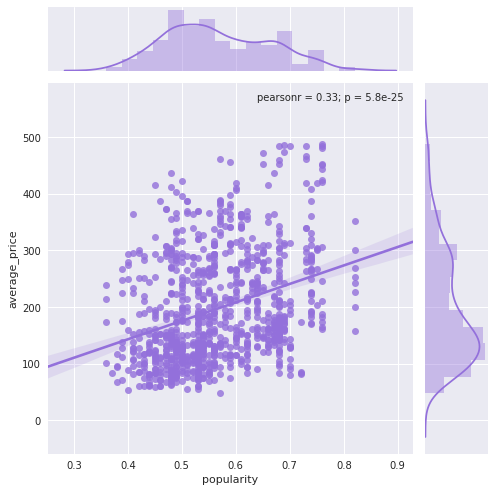

In [249]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("popularity", "average_price", data=rap, kind="reg",color="#9370DB", size=7)

# Price VS Streamcount

In [199]:
#Seatgeek artists + genre 

con = mdb.connect(host = 'localhost', 
                  user = 'root',
                  database = 'Project',
                  passwd = '<password>', 
                  charset='utf8', use_unicode=True)
    
query_template = '''select c.artist, c.average_price, l.playcount, a.genres 
                    from Project.seatgeek_concerts c
                    join Project.lastfm_cleaned l on c.artist = l.artist_name 
                    join Project.seatgeek_artists a on a.artist = l.artist_name
                    '''
cur = con.cursor(mdb.cursors.DictCursor)
cur.execute(query_template, )
data2 = cur.fetchall()
cur.close()
con.close()
last_fm = pd.DataFrame( list(data2) )

In [200]:
def belowIQR(dataframe, columnname):
    Q3 = float(np.percentile(dataframe[columnname], 75))
    Q1 = float(np.percentile(dataframe[columnname], 25))
    IQR = Q3 - Q1
    belowIQR = Q1 - 1.5*IQR
    return belowIQR

def aboveIQR(dataframe, columnname):
    Q3 = float(np.percentile(dataframe[columnname], 75))
    Q1 = float(np.percentile(dataframe[columnname], 25))
    IQR = Q3 - Q1
    aboveIQR = Q3 + 1.5*IQR
    return aboveIQR

def price_clean(dataframe, columnname):
    dataframe = dataframe[dataframe[columnname] >= 0]
    dataframe = dataframe.loc[(dataframe[columnname] < aboveIQR(dataframe, columnname)) 
                  & (dataframe[columnname] > belowIQR(dataframe, columnname))]
    return dataframe

In [201]:
#Creating dataframe for Seatgeek(State) Price Analysis

lastfm_cleaned = last_fm #remove NaNs
lastfm_cleaned = lastfm_cleaned.dropna()
lastfm_cleaned = price_clean(lastfm_cleaned, 'average_price')
lastfm_cleaned = price_clean(lastfm_cleaned, 'playcount')
#lastfm_cleaned['state'] = lastfm_cleaned['address'].apply(lambda x: state_symbol(x))
#lastfm_cleaned['popularity'] = lastfm_cleaned.popularity.astype(float) #Change popularity to float


len(lastfm_cleaned)

4594

## SET GENRE

In [238]:
lastfm_cleaned2 = lastfm_cleaned[lastfm_cleaned['genres'].str.contains('pop')]

In [239]:
streaming = lastfm_cleaned2[['average_price', 'playcount']]

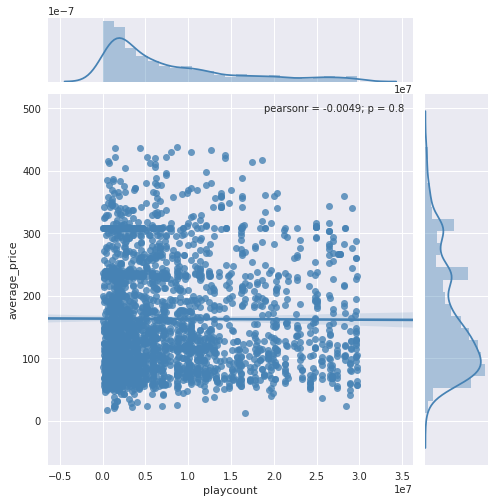

In [242]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("playcount", "average_price", data=streaming, kind="reg",color="#4682B4", size=7)